In [2]:
# logfileovveride = 'logs/2018-11-26_13:43:52_302.agent.log'
logfileovveride = None

import glob
import csv
import numpy as np
import json
logs = glob.glob("important_logs/*.agent.log")
logs.sort()
newest_log_filename = logs[-1]
print(newest_log_filename)
with open(newest_log_filename if not logfileovveride else logfileovveride) as f:
    data = json.loads(f.read())

important_logs/2018-12-08_12:35:17_590.agent.log


In [101]:
d = np.array(([
    (
#         x['speedX'],
        x['trackPos'],
#         x['']
    ) for x in data ]), dtype='float')

In [7]:
for x in data[0].keys(): print(x)

angle
curLapTime
damage
distFromStart
distRaced
focus
fuel
gear
lastLapTime
opponents
pitch
racePos
roll
rpm
speedGlobalX
speedGlobalY
speedX
speedY
speedZ
track
trackPos
wheelSpinVel
x
y
yaw
z
accel
brake
clutch
meta
steer


In [51]:
def extract_parameters(data):
    action_keys = [
        'accel',
        'brake',
        'steer',
    ]
    
    state_keys = [
        'angle',
        'distFromStart',
        'track',
        'speedX',
        'speedY',
        'trackPos'
    ]
    processed = [
        (
            {k: x[k] for k in action_keys},
            {k: x[k] for k in state_keys}
        )
     for x in data
    ]
    actions, states = zip(*processed)
    for s  in states:
        s['track'] = tuple(s['track'])
    return map(state_to_vector, states), map(state_to_vector, actions)

def state_to_vector(s):
    res = []
    for k,v in s.items():
        if type(v) == type([]):
            res += v
        res.append(v)
    return res
        

In [52]:
states, actions = extract_parameters(data)
(
#     len
    (set([tuple(a) for a in actions]))
)

{(0, 0, 0),
 (0, 0, 0.3),
 (0, 0, 0.315),
 (0, 0, 0.32999999999999996),
 (0, 0, 0.345),
 (0, 0, 0.36),
 (0, 0, 0.375),
 (0, 0, 0.39),
 (0, 0, 0.40499999999999997),
 (0, 0, 0.42),
 (0, 0, 0.435),
 (0, 0, 0.44999999999999996),
 (0, 0, 0.46499999999999997),
 (0, 0, 0.48),
 (0, 0, 0.495),
 (0, 0, 0.51),
 (0, 0, 0.525),
 (0, 0, 0.54),
 (0, 0, 0.5549999999999999),
 (0, 0, 0.57),
 (0, 0, 0.585),
 (0, 0, 0.6),
 (0, 0, 0.615),
 (0, 0, 0.63),
 (0, 0, 0.645),
 (0, 0, 0.6599999999999999),
 (0, 0, 0.6749999999999999),
 (0, 0, 0.69),
 (0, 0, 0.705),
 (0, 0, 0.72),
 (0, 0, 0.735),
 (0, 0, 0.75),
 (0, 0, 0.765),
 (0, 0, 0.78),
 (0, 0, 0.7949999999999999),
 (0, 0, 0.8099999999999999),
 (0, 0, 0.825),
 (0, 0, 0.84),
 (0, 0, 1.0),
 (0, 1, -0.21),
 (0, 1, -0.195),
 (0, 1, -0.18),
 (0, 1, -0.16499999999999998),
 (0, 1, -0.15),
 (0, 1, -0.135),
 (0, 1, -0.12),
 (0, 1, -0.105),
 (0, 1, -0.09),
 (0, 1, -0.075),
 (0, 1, -0.06),
 (0, 1, -0.045),
 (0, 1, -0.03),
 (0, 1, 0),
 (0, 1, 0.015),
 (0, 1, 0.03),
 (0, 1,

In [53]:
list(states)[:4]

[[1.0017937864744392e-05,
  3085.83,
  (10.6066,
   23.0366,
   36.0729,
   61.5414,
   107.517,
   171.941,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   171.941,
   107.517,
   61.5414,
   36.073,
   23.0367,
   10.6066),
  0.0,
  0.0,
  1.4623e-06],
 [1.0017937864744392e-05,
  3085.83,
  (10.6066,
   23.0366,
   36.0729,
   61.5414,
   107.517,
   171.941,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   171.941,
   107.517,
   61.5414,
   36.073,
   23.0367,
   10.6066),
  0.0,
  0.0,
  1.4623e-06],
 [1.0017937864744392e-05,
  3085.83,
  (10.6066,
   23.0366,
   36.0729,
   61.5414,
   107.517,
   171.941,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   171.941,
   107.517,
   61.5414,
   36.073,
   23.0367,
   10.6066),
  0.0,
  0.0,
  1.4623e-06],
 [1.0017937864744392e-05,
  3085.83,
  (10.6066,
   23.0366,
   36.0729,
   61.5414,
   107.517,
   171.941,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
 

Populating the interactive namespace from numpy and matplotlib


/home/kku/.miniconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


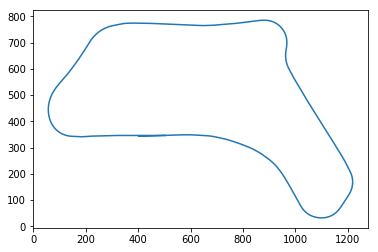

In [16]:
%pylab inline
d = np.array(([
    (
        x['x'],
        x['y'],
    ) for x in data ]), dtype='float')
plt.plot(d[:,0], d[:,1])

In [17]:
hardest_i = np.abs(d[:,1]).argmax()
hardest_i, *tuple(d[hardest_i])

(6574, 2749.6, 0.543646)

In [18]:
data[hardest_i]['track']

'[3.7464, 9.07057, 15.9321, 35.4147, 135.148, 200.0, 200.0, 200.0, 199.762, 165.764, 141.664, 123.691, 105.045, 89.6223, 70.3063, 49.2048, 32.9407, 22.7269, 11.436]'

In [9]:
data[hardest_i]['speedY']

'3.28922'

In [10]:
np.sum(d[:, 0] == d[0,0])

59

In [58]:
with open('logs/speed_limits.log') as f:
#     data = [json.loads(x) for x in f]
    data = json.loads(f.read())
data

[[190,
  [[40, 150.97],
   [190, 130.03],
   [340, 130.03],
   [265.0, 130.03],
   [227.5, 130.03],
   [208.75, 130.03],
   [199.375, 130.03],
   [194.6875, 130.03],
   [192.34375, 130.03],
   [191.171875, 130.03]]],
 [154.84375,
  [[40, 130.03],
   [190, inf],
   [115.0, 106.97],
   [190.0, inf],
   [152.5, 103.24],
   [190.0, inf],
   [171.25, inf],
   [161.875, inf],
   [157.1875, inf],
   [154.84375, 103.11],
   [157.1875, inf],
   [156.015625, inf]]],
 [164.21875,
  [[40, 103.11],
   [190, inf],
   [115.0, 80.24],
   [190.0, inf],
   [152.5, 76.48],
   [190.0, inf],
   [171.25, inf],
   [161.875, 76.03],
   [171.25, inf],
   [166.5625, inf],
   [164.21875, 75.88],
   [166.5625, inf],
   [165.390625, inf]]],
 [52.890625,
  [[40, 75.88],
   [190, inf],
   [115.0, inf],
   [77.5, inf],
   [58.75, inf],
   [49.375, 67.74],
   [58.75, inf],
   [54.0625, inf],
   [51.71875, 66.22],
   [54.0625, inf],
   [52.890625, 65.47],
   [54.0625, inf]]]]

In [18]:
x = [1,2,3,4,5,6,7,8]
list(zip(x[::2], x[1::2]))

[(1, 2), (3, 4), (5, 6), (7, 8)]